### Biblitecas

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import tokenize
import nltk
import seaborn as sns
from nltk import word_tokenize
from string import punctuation
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import NearestNeighbors
import re
import time
from datasketch import MinHash, MinHashLSHForest
from string import punctuation

# Data Cleaning

### Leitura os dados da base Scopus

In [8]:
dados_scopus1 = pd.read_csv("scopus2016-1.csv")
dados_scopus2 = pd.read_csv("scopus2016-2.csv")
dados_scopus3 = pd.read_csv("scopus2017-1.csv")
dados_scopus4 = pd.read_csv("scopus2017-2.csv")

### Leitura os dados da base IEEE

In [9]:
dados_ieee1 = pd.read_csv("ieee2016-1.csv")
dados_ieee2 = pd.read_csv("ieee2016-2.csv")
dados_ieee3 = pd.read_csv("ieee2017-1.csv")

#dados_ieee4 = pd.read_csv("ieee2017-2.csv")



### Verificando as colunas da base scopus e selecionando as colunas relevantes

In [10]:
for col in dados_scopus1.columns:
    print(col) 

Authors
Author(s) ID
Title
Year
Source title
Volume
Issue
Art. No.
Page start
Page end
Page count
Cited by
DOI
Link
Affiliations
Authors with affiliations
Abstract
Author Keywords
Index Keywords
Correspondence Address
Editors
Publisher
ISSN
ISBN
CODEN
PubMed ID
Language of Original Document
Abbreviated Source Title
Document Type
Publication Stage
Access Type
Source
EID


In [11]:
df1 = dados_scopus1[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
df2 = dados_scopus2[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
df3 = dados_scopus3[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
df4 = dados_scopus4[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]

### Verificando as colunas da base ieee, renomeando as colunas e selecionando as colunas relevantes

In [12]:
for col in dados_ieee1.columns:
    print(col) 

Document Title
Authors
Author Affiliations
Publication Title
Date Added To Xplore
Publication Year
Volume
Issue
Start Page
End Page
Abstract
ISSN
ISBNs
DOI
Funding Information
PDF Link
Author Keywords
IEEE Terms
INSPEC Controlled Terms
INSPEC Non-Controlled Terms
Mesh_Terms
Article Citation Count
Patent Citation Count
Reference Count
License
Online Date
Issue Date
Meeting Date
Publisher
Document Identifier


In [16]:
dados_ieee1 = dados_ieee1.rename(columns={'Document Title': 'Title'})
dados_ieee1 = dados_ieee1.rename(columns={'Publication Year': 'Year'})
dados_ieee1 = dados_ieee1.rename(columns={'PDF Link': 'Link'})
dados_ieee1 = dados_ieee1.rename(columns={'Author Affiliations': 'Authors with affiliations'})
dados_ieee1 = dados_ieee1.rename(columns={'Author Affiliations': 'Authors with affiliations'})

dados_ieee2 = dados_ieee2.rename(columns={'Document Title': 'Title'})
dados_ieee2 = dados_ieee2.rename(columns={'Publication Year': 'Year'})
dados_ieee2 = dados_ieee2.rename(columns={'PDF Link': 'Link'})
dados_ieee2 = dados_ieee2.rename(columns={'Author Affiliations': 'Authors with affiliations'})
dados_ieee2 = dados_ieee2.rename(columns={'Author Affiliations': 'Authors with affiliations'})

dados_ieee3 = dados_ieee3.rename(columns={'Document Title': 'Title'})
dados_ieee3 = dados_ieee3.rename(columns={'Publication Year': 'Year'})
dados_ieee3 = dados_ieee3.rename(columns={'PDF Link': 'Link'})
dados_ieee3 = dados_ieee3.rename(columns={'Author Affiliations': 'Authors with affiliations'})
dados_ieee3 = dados_ieee3.rename(columns={'Author Affiliations': 'Authors with affiliations'})

#dados_ieee4 = dados_ieee4.rename(columns={'Document Title': 'Title'})
#dados_ieee4 = dados_ieee4.rename(columns={'Publication Year': 'Year'})
#dados_ieee4 = dados_ieee4.rename(columns={'PDF Link': 'Link'})
#dados_ieee4 = dados_ieee4.rename(columns={'Author Affiliations': 'Authors with affiliations'})
#dados_ieee4 = dados_ieee4.rename(columns={'Author Affiliations': 'Authors with affiliations'})

In [34]:
df5 = dados_ieee1[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
df6 = dados_ieee2[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
df7 = dados_ieee3[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]
#df8 = dados_ieee4[['Authors', 'Title', 'Year', 'DOI', 'Link', 'Authors with affiliations', 'Abstract', 'Author Keywords', 'Publisher']]

In [35]:
print(df1.shape,df2.shape,df3.shape,df4.shape,df5.shape,df6.shape,df7.shape)

(2000, 9) (268, 9) (281, 9) (2000, 9) (2000, 9) (871, 9) (60, 9)


# Data integration and Data transformation

In [36]:
dfs = [df1, df2, df3, df4, df5, df6]
df = pd.concat(dfs)

In [37]:
df.shape

(7420, 9)

### Removendo os artigos duplicados

In [38]:
df = df.drop_duplicates(subset='Title', keep="first")

In [39]:
df.shape

(6850, 9)

### Removendo linhas em que não há autor

In [40]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Authors"], inplace=True)
df.dropna(subset = ["Authors with affiliations"], inplace=True)

In [41]:
df.shape

(6819, 9)

## Pré-processamento

### Retirando letras Maiusculas

In [42]:
frase_processada = list()
for opiniao in df["Author Keywords"]:
    nova_frase = list()
    opiniao = str(opiniao).lower()
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    for palavra in palavras_texto:
        nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df["Tratamento1"] = frase_processada

### Retirando Pontuação

In [43]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

frase_processada = list()
for opiniao in df["Tratamento1"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    for palavra in palavras_texto:
        if palavra not in pontuacao:
            nova_frase.append(palavra)
        else:
            if palavra == ';':
                nova_frase.append(palavra)
            
    frase_processada.append(' '.join(nova_frase))
    
df["Tratamento2"] = frase_processada

In [44]:
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

# Selecionar os Artigos que o Primeiro Autor é de Instituição Brasileira

# Data selection

In [45]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
list_country = list()
sign = -1
for afiliacoes in df["Authors with affiliations"]:
    if (sign == 0) :
        list_country.append(word)
    word = ""
    sign = 0
    palavras_texto = token_pontuacao.tokenize(str(afiliacoes))
    for palavra in palavras_texto:
        if( sign == 0):
            if palavra not in pontuacao:
                word = palavra
            else:
                if palavra == ";":
                    list_country.append(word)
                    sign = 1
                         
df["first author country"] = list_country

In [46]:
dados_filtered1 = df[df["first author country"] =='Brazil']
dados_filtered2 = df[df["first author country"] =='Brasil']
dados_filtered3 = df[df["first author country"] =='Brazilian']

dados_filtereds = [dados_filtered1, dados_filtered2, dados_filtered3]
dados_filtered1 = pd.concat(dados_filtereds)

# Data Mining

### Gerando lista de Palavras Compostas

In [47]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

list_palavra = list()
frase_processada = list()
nova_palavra = ""
sigla = 0
for opiniao in dados_filtered1["Tratamento1"]:
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    if nova_palavra != "":
        frase_processada.append(nova_palavra)
        list_palavra.append(nova_palavra)
    nova_palavra = ""
    for palavra in palavras_texto:
        if(sigla == 0):
            if palavra not in pontuacao:
                if(palavra != "nan"):
                    if nova_palavra == "":
                        nova_palavra = palavra
                    else:
                        nova_palavra = nova_palavra + " " + palavra
            else:
                if palavra == ";":
                    list_palavra.append(nova_palavra)
                    frase_processada.append(nova_palavra)
                    nova_palavra = ""
        else:
            if palavra == ")":
                sigla = 0

In [48]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    lista_frequencia = list()
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("% s : % s"%(key, value))  
        
    return freq

In [49]:
dicionario_frequencia = CountFrequency(list_palavra) 

lexicon based dictionary : 1
sentiment analysis : 35
social networks : 10
influential users detection : 1
classification : 24
machine learning : 55
natural language processing : 12
public transportation : 1
blob detection : 1
development tool : 1
sprite sheet : 1
data mining : 132
microrna : 1
pre mirna ab initio prediction : 1
random forest : 5
smote : 1
artificial neural network : 6
cost sensitive classification : 1
peptide protein identification : 1
phosphoproteomics : 1
shotgun proteomics : 1
bacterial genome : 1
bioinformatics : 4
genome assembly : 1
genome finishing : 1
ion torrent pgm : 1
web tool : 1
building material consumption : 1
electrical systems : 1
estimation : 1
feature selection : 12
information extraction : 7
intelligent systems : 3
big time series data : 1
deep learning : 10
graphics processing unit : 2
household electricity demand : 2
microgrid : 1
parallel forecasting model : 1
aerophotogrammetric surrey : 1
decision tree : 10
secondary forests : 2
biodiesel : 1
b

In [50]:
df_frequencia_tratamento1 = pd.DataFrame({"Palavra": list(dicionario_frequencia.keys()),
                             "Frequência": list(dicionario_frequencia.values())})
df_frequencia_tratamento1 = df_frequencia_tratamento1.nlargest(columns = "Frequência", n = 11)
df_frequencia_tratamento1 = df_frequencia_tratamento1.iloc[1:]
df_frequencia_tratamento1

,Palavra,Frequência
5,machine learning,55
50,text mining,37
1,sentiment analysis,35
4,classification,24
59,educational data mining,15
108,ontology,14
161,clustering,14
255,big data,14
576,power quality,14
6,natural language processing,12


### Pattern evaluation

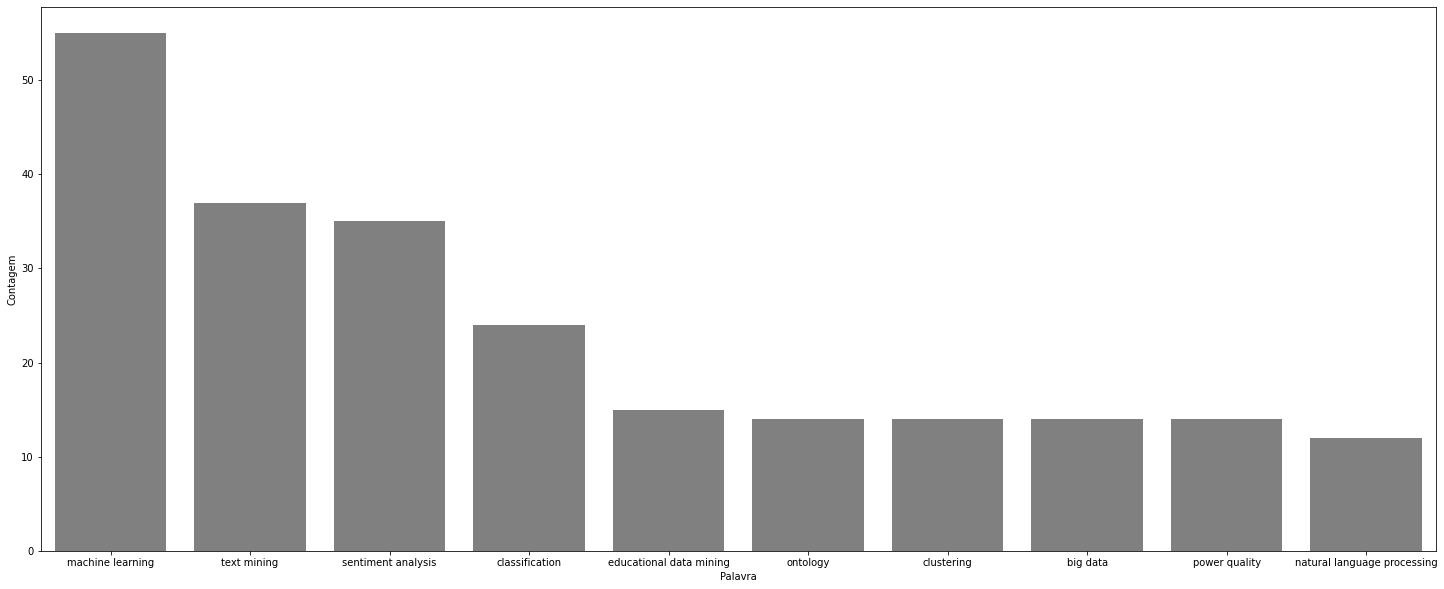

In [51]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_frequencia_tratamento1, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

# Selecionar os Artigos que Pelo Menos um Autor é de Instituição Brasileira

In [52]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)
    
list_geral = list()
sign = -1
result = ""
for afiliacoes in df["Authors with affiliations"]:
    result = ""
    sign = 0
    palavras_texto = token_pontuacao.tokenize(str(afiliacoes))
    for palavra in palavras_texto:
        if(sign == 0):
            if palavra == 'Brazil' or palavra == 'Brasil' or palavra == 'Brazilian':
                result = 'sim'
                sign = 1
            else:
                result = 'nao'
    list_geral.append(result)
                          
df["there are Brazilian authors?"] = list_geral

In [53]:
dados_filtered2 = df[df["there are Brazilian authors?"] =='sim']

In [54]:
df.to_csv (r'export_dataframe.csv', index = False, header=True)

### Gerando lista de palavras

In [55]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

list_palavra = list()
frase_processada = list()
nova_palavra = ""
sigla = 0
for opiniao in dados_filtered2["Tratamento1"]:
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    if nova_palavra != "":
        frase_processada.append(nova_palavra)
        list_palavra.append(nova_palavra)
    nova_palavra = ""
    for palavra in palavras_texto:
        if(sigla == 0):
            if palavra not in pontuacao:
                if(palavra != "nan"):
                    if nova_palavra == "":
                        nova_palavra = palavra
                    else:
                        nova_palavra = nova_palavra + " " + palavra
            else:
                if palavra == ";":
                    list_palavra.append(nova_palavra)
                    frase_processada.append(nova_palavra)
                    nova_palavra = ""
        else:
            if palavra == ")":
                sigla = 0

In [56]:
dicionario_frequencia = CountFrequency(list_palavra)

lexicon based dictionary : 1
sentiment analysis : 37
social networks : 10
evaluation : 2
machine learning algorithms : 2
one class classification : 1
outlier detection : 4
predictive models : 5
semi supervised learning : 5
unsupervised learning : 2
influential users detection : 1
classification : 26
machine learning : 58
natural language processing : 13
public transportation : 1
blob detection : 1
development tool : 1
sprite sheet : 1
data mining : 143
microrna : 1
pre mirna ab initio prediction : 1
random forest : 6
smote : 1
artificial neural network : 6
cost sensitive classification : 1
peptide protein identification : 1
phosphoproteomics : 1
shotgun proteomics : 1
bacterial genome : 1
bioinformatics : 4
genome assembly : 1
genome finishing : 1
ion torrent pgm : 1
web tool : 1
building material consumption : 1
electrical systems : 1
estimation : 1
feature selection : 13
information extraction : 7
intelligent systems : 3
big time series data : 1
deep learning : 10
graphics processing

In [57]:
df_frequencia_tratamento2 = pd.DataFrame({"Palavra": list(dicionario_frequencia.keys()),
                             "Frequência": list(dicionario_frequencia.values())})
df_frequencia_tratamento2 = df_frequencia_tratamento2.nlargest(columns = "Frequência", n = 11)
df_frequencia_tratamento2 = df_frequencia_tratamento2.iloc[1:]
df_frequencia_tratamento2

,Palavra,Frequência
12,machine learning,58
1,sentiment analysis,37
63,text mining,37
11,classification,26
182,clustering,19
121,ontology,18
295,big data,16
72,educational data mining,15
645,power quality,14
13,natural language processing,13


### Pattern evaluation

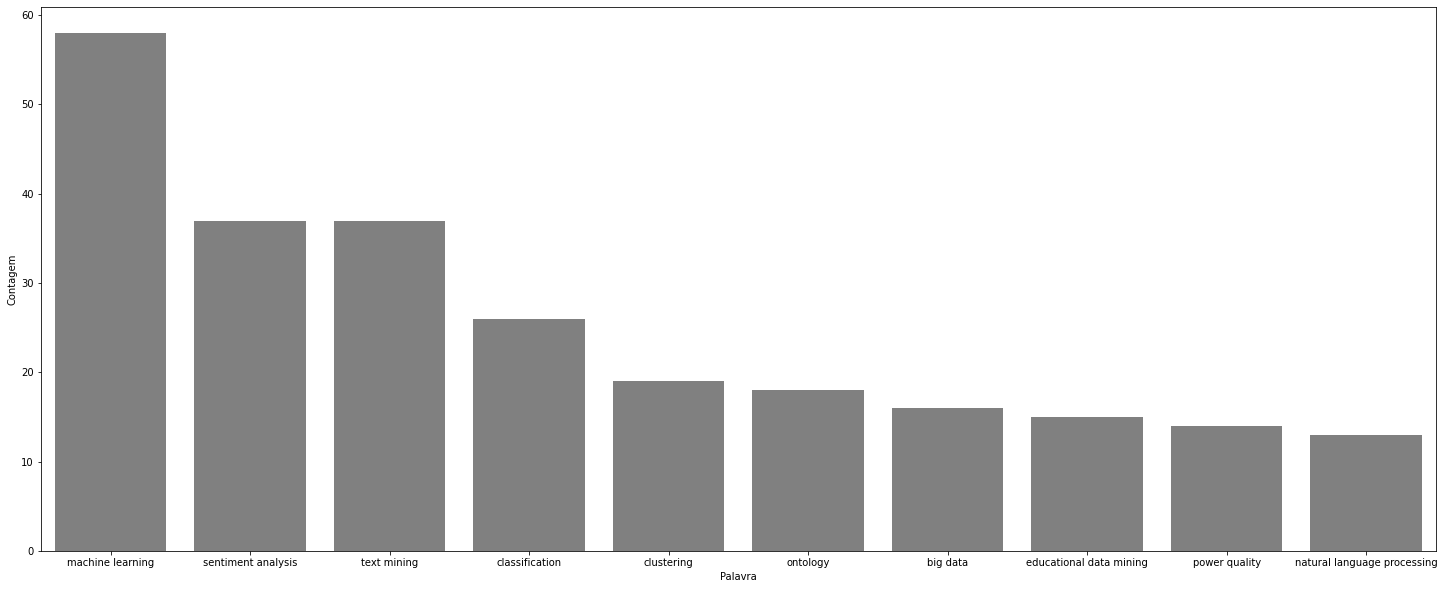

In [58]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_frequencia_tratamento2, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

# Selecionando todos os artigos do dataset

In [59]:
frase_processada = list()
for opiniao in df["Author Keywords"]:
    nova_frase = list()
    opiniao = str(opiniao).lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
df["Tratamento1"] = frase_processada
df

,Authors,Title,Year,DOI,Link,Authors with affiliations,Abstract,Author Keywords,Publisher,Tratamento1,Tratamento2,first author country,there are Brazilian authors?
0,"Yan Y., Sheng G., Liu Y., Du X., Wang H., Jian...",Anomalous state detection of power transformer...,2016,10.13336/j.1003-6520.hve.20161128041,https://www.scopus.com/inward/record.uri?eid=2...,"Yan, Y., Department of Electrical Engineering,...",The online monitoring of power transformer is ...,Anomalous state detection; K-means clustering ...,Science Press,anomalous state detection ; k - means clusteri...,anomalous state detection ; k means clustering...,China,nao
1,"Vinod Kumar L., Natarajan S., Keerthana S., Ch...",Credit Risk Analysis in Peer-to-Peer Lending S...,2016,10.1109/ICKEA.2016.7803017,https://www.scopus.com/inward/record.uri?eid=2...,"Vinod Kumar, L., CISCO Systems, Bangalore, Ind...",This research paper aims to analyze the credit...,credit risk analysis; data mining for banking;...,Institute of Electrical and Electronics Engine...,credit risk analysis ; data mining for banking...,credit risk analysis ; data mining for banking...,India,nao
2,"Pablo E., Jung K.",Knowledge extraction through etymological netw...,2016,10.1109/ICKEA.2016.7803019,https://www.scopus.com/inward/record.uri?eid=2...,"Pablo, E., Seoul National University, South Ko...",Extracting knowledge from a text is a very act...,Chinese characters; edge classification; graph...,Institute of Electrical and Electronics Engine...,chinese characters ; edge classification ; gra...,chinese characters ; edge classification ; gra...,Korea,nao
3,"Kawamoto Y., Nishiyama Y., Kobayashi A., Sakaj...",Investigation and construction of dictionary f...,2016,10.1109/ICAICTA.2016.7803102,https://www.scopus.com/inward/record.uri?eid=2...,"Kawamoto, Y., Department of Computer Science a...",Communication via comments is carried out acti...,Morphological analysis; Text mining; Video sha...,Institute of Electrical and Electronics Engine...,morphological analysis ; text mining ; video s...,morphological analysis ; text mining ; video s...,Japan,nao
4,"Suwanwiwat R., Kamonsantiroj S., Pipanmaekapor...",Mining inter-transaction recurring patterns in...,2016,10.1109/ICKEA.2016.7802986,https://www.scopus.com/inward/record.uri?eid=2...,"Suwanwiwat, R., Department of Computer and Inf...",Mining recurring patterns plays an important r...,data mining; periodic pattern mining; recurrin...,Institute of Electrical and Electronics Engine...,data mining ; periodic pattern mining ; recurr...,data mining ; periodic pattern mining ; recurr...,Thailand,nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,C. Correa; A. Sanchez; G. Marulanda,Expansion of Transmission Networks Considering...,2016,10.1109/TLA.2016.7459604,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"Univ. De La Salle, Bogota, Colombia; Univ. De ...",This paper presents an algorithm for solving t...,robust optimization;Transmission planning;unce...,IEEE,robust optimization ; transmission planning ; ...,robust optimization ; transmission planning ; ...,Colombia,nao
821,M. R. Mansour; L. F. C. Alberto; R. A. Ramos,Preventive Control Design for Voltage Stabilit...,2016,10.1109/TPWRS.2015.2422072,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"University of Sao Paulo, Sao Carlos, Brazil; U...",A new methodology for selecting a global group...,Clustering method;preventive control selection...,IEEE,clustering method ; preventive control selecti...,clustering method ; preventive control selecti...,Brazil,sim
822,C. Q. Santos; R. Tietzmann; M. Trasel; S. Mora...,Can Visualization Techniques Help Journalists ...,2016,10.1109/HICSS.2016.245,https://ieeexplore-ieee-org.ez76.periodicos.ca...,"Fac. de Inf., PUCRS, Porto Alegre, Brazil; Fac...",The use of social networks has increased stead...,Social networks;Data visualization techniques;...,IEEE,social networks ; data visualization technique...,social networks ; data visualization technique...,Brazil,sim
823,

In [60]:
pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

list_palavra = list()
frase_processada = list()
nova_palavra = ""
sigla = 0
for opiniao in df["Tratamento1"]:
    palavras_texto = token_pontuacao.tokenize(str(opiniao))
    if nova_palavra != "":
        frase_processada.append(nova_palavra)
        list_palavra.append(nova_palavra)
    nova_palavra = ""
    for palavra in palavras_texto:
        if(sigla == 0):
            if palavra not in pontuacao:
                if(palavra != "nan"):
                    if nova_palavra == "":
                        nova_palavra = palavra
                    else:
                        nova_palavra = nova_palavra + " " + palavra
            else:
                if palavra == ";":
                    list_palavra.append(nova_palavra)
                    frase_processada.append(nova_palavra)
                    nova_palavra = ""
        else:
            if palavra == ")":
                sigla = 0

In [61]:
dicionario_frequencia = CountFrequency(list_palavra)

anomalous state detection : 1
k means clustering method : 1
multi dimensional data : 3
online monitoring : 3
sliding windows : 2
credit risk analysis : 1
data mining for banking : 1
ensemble classification : 3
machine learning applications : 1
chinese characters : 1
edge classification : 1
graph mining : 24
korean language : 1
morphological analysis : 1
text mining : 240
video sharing site : 1
web mining : 36
data mining : 1536
periodic pattern mining : 1
recurring pattern : 1
time series : 52
cloud computing : 60
intelligent information application : 1
mapreduce : 53
scheduler : 2
task allocation : 2
online comments : 1
reviews ranking : 1
sentence representation : 1
summary extraction : 1
customer queuing systems : 1
time series forecasting analysis : 1
waiting time prediction : 1
knowledge based models : 2
knowledge engineering : 4
lifelong machine learning : 1
topic modeling : 37
android system : 1
evaluation model : 1
index evaluation : 1
text ming : 1
user experience : 2
aspect a

In [62]:
df_frequencia_tratamento3 = pd.DataFrame({"Palavra": list(dicionario_frequencia.keys()),
                             "Frequência": list(dicionario_frequencia.values())})
df_frequencia_tratamento3 = df_frequencia_tratamento3.nlargest(columns = "Frequência", n = 11)
df_frequencia_tratamento3 = df_frequencia_tratamento3.iloc[1:]
df_frequencia_tratamento3


,Palavra,Frequência
127,machine learning,353
121,big data,318
278,classification,247
14,text mining,240
55,sentiment analysis,238
172,clustering,235
108,feature selection,133
107,decision tree,128
154,natural language processing,96
110,opinion mining,88


### Pattern evaluation

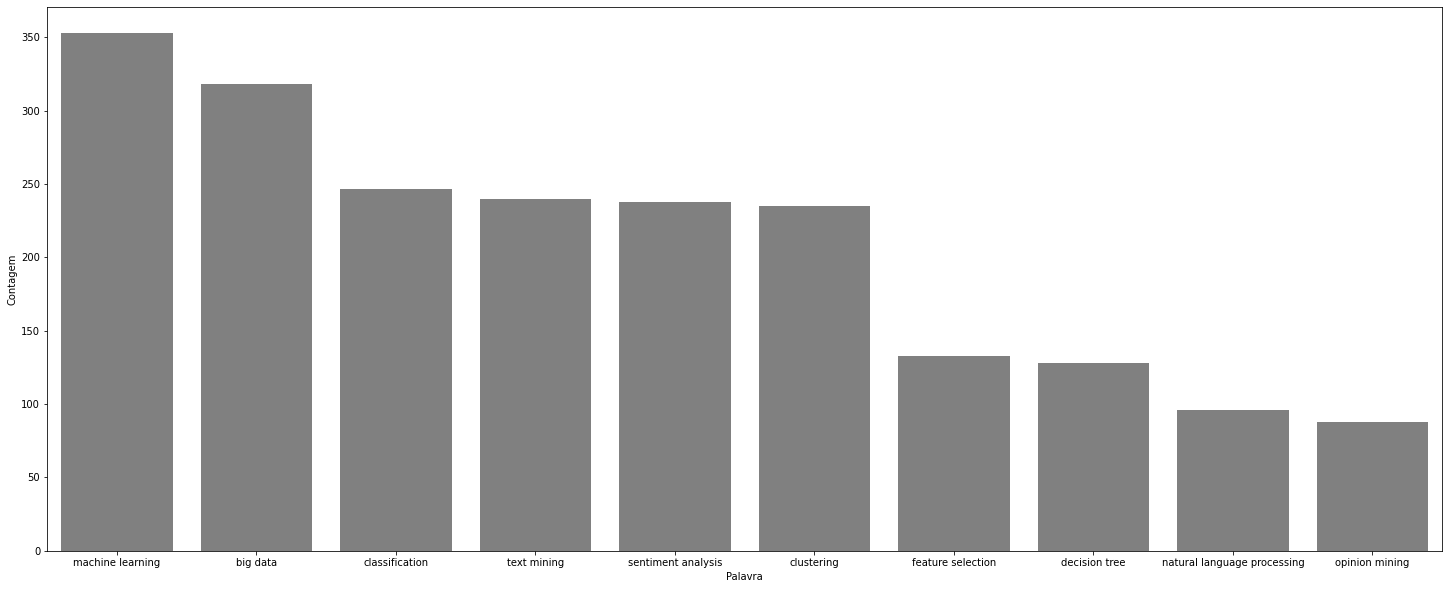

In [63]:
plt.figure(figsize=(25,10))
ax = sns.barplot(data = df_frequencia_tratamento3, x= "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

In [64]:
values = dicionario_frequencia.values()
values_list = list(values)
elm_count = values_list.count(1)
sum_all = sum(values_list)
print(elm_count, sum_all)

11780 27603


In [65]:
values_list

[1,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 24,
 1,
 1,
 240,
 1,
 36,
 1536,
 1,
 1,
 52,
 60,
 1,
 53,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 37,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 5,
 2,
 1,
 1,
 3,
 6,
 1,
 3,
 24,
 1,
 1,
 238,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 3,
 30,
 10,
 77,
 1,
 1,
 1,
 4,
 68,
 5,
 27,
 9,
 1,
 1,
 6,
 3,
 1,
 22,
 1,
 3,
 3,
 1,
 2,
 1,
 1,
 61,
 1,
 2,
 6,
 35,
 1,
 1,
 2,
 2,
 1,
 65,
 2,
 16,
 1,
 3,
 2,
 1,
 1,
 1,
 128,
 133,
 10,
 88,
 6,
 1,
 1,
 1,
 1,
 1,
 6,
 1,
 2,
 1,
 318,
 1,
 40,
 2,
 5,
 1,
 353,
 1,
 28,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 35,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 84,
 2,
 18,
 30,
 5,
 1,
 1,
 3,
 44,
 96,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 71,
 1,
 9,
 1,
 1,
 1,
 20,
 1,
 8,
 235,
 63,
 40,
 1,
 1,
 1,
 1,
 1,
 6,
 7,
 65,
 3,
 13,
 1,
 43,
 4,
 3,
 2,
 2,
 8,
 6,
 17,
 14,
 4,
 2,
 14,
 6,
 4,
 10,
 3,
 2,
 3,
 1,
 2,
 14,
 1,
 18,
 1,
 3,
 1,
 9,
 55,
 2,
 23,
 11,
 2,
 1,
 1,
 8,
 4,
 3,
 32,
 8,
 20,
 11,
 1,
 1,
 1,
 22,
 8,
 2,
 1,


# Sistema de recomendação de artigos

# Data Mining

In [66]:
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [71]:
#Number of Permutations
permutations = 128

#Number of Recommendations to return
num_recommendations = 10

In [89]:
def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in data['text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    return forest

In [90]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    
    result = database.iloc[idx_array]['Title']
    
    return result

In [91]:
df['text'] = df['Title']
forest = get_forest(df, permutations)

In [92]:
import numpy as np
top_10_artigos_primeiro_autor_brasileiro = list()
top_10_artigos_com_um_autor_brasileiro = list()
top_10_artigos_geral = list()

for word in df_frequencia_tratamento1["Palavra"]:
    num_recommendations = 10
    result = predict(str(word), df, permutations, num_recommendations, forest)  
    top_10_artigos_primeiro_autor_brasileiro.append((word, result))
    
for word in df_frequencia_tratamento2["Palavra"]:
    num_recommendations = 10
    result = predict(str(word), df, permutations, num_recommendations, forest)
    top_10_artigos_com_um_autor_brasileiro.append((word, result))
    
for word in df_frequencia_tratamento3["Palavra"]:
    num_recommendations = 10
    result = predict(str(word), df, permutations, num_recommendations, forest)
    top_10_artigos_geral.append((word, result))
    

In [93]:
top_10_artigos_primeiro_autor_brasileiro

[('machine learning',
  680                     Kernel-driven similarity learning
  1933    Machine learning techniques for age at death e...
  127     Geminivirus data warehouse: A database enriche...
  1847    Recent advances in scaling-down sampling metho...
  111     Reintroducing KAPD as a Dataset for Machine Le...
  1691    Using Machine Learning to Accelerate Data Wran...
  1428    Machine learning algorithms for oncology big d...
  530     Study of machine learning algorithms for speci...
  1602    DeMalC: A feature-rich machine learning framew...
  1181    Cryptographic Algorithm Identification Using M...
  Name: Title, dtype: object),
 ('text mining',
  772                         Representative Itemset Mining
  296     Social intimacy based IoT services mining of m...
  1000    Semantic bookworm: Mining literary resources r...
  754     Identifying Product Opportunities Using Social...
  48      Social innovation activities in Japanese firms...
  1652    Co-Clustering with S

In [80]:
top_10_artigos_com_um_autor_brasileiro

[('machine learning',
  680                     Kernel-driven similarity learning
  1933    Machine learning techniques for age at death e...
  127     Geminivirus data warehouse: A database enriche...
  1847    Recent advances in scaling-down sampling metho...
  111     Reintroducing KAPD as a Dataset for Machine Le...
  1691    Using Machine Learning to Accelerate Data Wran...
  1428    Machine learning algorithms for oncology big d...
  530     Study of machine learning algorithms for speci...
  1602    DeMalC: A feature-rich machine learning framew...
  1181    Cryptographic Algorithm Identification Using M...
  Name: Title, dtype: object),
 ('sentiment analysis',
  1859     Topic-related Chinese message sentiment analysis
  1043    Learning Word Representations for Sentiment An...
  71      Senpy: A pragmatic linked sentiment analysis f...
  1989    Sentiment-specific word embedding for Indonesi...
  213     Machine learning approaches for sentiment anal...
  599                  

In [81]:
top_10_artigos_geral

[('machine learning',
  680                     Kernel-driven similarity learning
  1933    Machine learning techniques for age at death e...
  127     Geminivirus data warehouse: A database enriche...
  1847    Recent advances in scaling-down sampling metho...
  111     Reintroducing KAPD as a Dataset for Machine Le...
  1691    Using Machine Learning to Accelerate Data Wran...
  1428    Machine learning algorithms for oncology big d...
  530     Study of machine learning algorithms for speci...
  1602    DeMalC: A feature-rich machine learning framew...
  1181    Cryptographic Algorithm Identification Using M...
  Name: Title, dtype: object),
 ('big data',
  93                         Exploring complex and big data
  1567        Privacy-Aware Big Data Warehouse Architecture
  771     Sentiment analysis based on Support Vector Mac...
  1359    Knowledge extraction from big data using MapRe...
  520                               Big Data Bioinformatics
  1995    GOMA: Supporting big da

In [82]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    result = list()
    i = 0
    while i < len(idx_array):
        result.append((text, idx_array[i], database.iloc[idx_array[i]]['Title']))
        i += 1
    #result = database.iloc[2948]['Title']
    
    return result

In [83]:
import numpy as np
top_10_artigos_primeiro_autor_brasileiro = list()
top_10_artigos_com_um_autor_brasileiro = list()
top_10_artigos_geral = list()

for word in df_frequencia_tratamento1["Palavra"]:
    num_recommendations = 10
    result = predict(str(word), df, permutations, num_recommendations, forest)   
    top_10_artigos_primeiro_autor_brasileiro.append(result)

In [84]:
top_10_artigos_primeiro_autor_brasileiro

[[('machine learning', 3171, 'Kernel-driven similarity learning'),
  ('machine learning',
   5989,
   'Machine learning techniques for age at death estimation from long bone lengths'),
  ('machine learning',
   2345,
   'Geminivirus data warehouse: A database enriched with machine learning approaches'),
  ('machine learning',
   4298,
   'Recent advances in scaling-down sampling methods in machine learning'),
  ('machine learning',
   4525,
   'Reintroducing KAPD as a Dataset for Machine Learning and Data Mining Applications'),
  ('machine learning',
   5812,
   'Using Machine Learning to Accelerate Data Wrangling'),
  ('machine learning',
   3894,
   'Machine learning algorithms for oncology big data treatment'),
  ('machine learning',
   4854,
   'Study of machine learning algorithms for special disease prediction using principal of component analysis'),
  ('machine learning',
   4060,
   'DeMalC: A feature-rich machine learning framework for malicious call detection'),
  ('machine l

In [85]:
i = 1
df_rc = pd.DataFrame(top_10_artigos_primeiro_autor_brasileiro[1],columns=['Palavra', 'indice', 'Artigo Recomendado'])
df_rc

,Palavra,indice,Artigo Recomendado
0,text mining,5059,Representative Itemset Mining
1,text mining,2791,Social intimacy based IoT services mining of m...
2,text mining,5228,Semantic bookworm: Mining literary resources r...
3,text mining,3245,Identifying Product Opportunities Using Social...
4,text mining,48,Social innovation activities in Japanese firms...
5,text mining,1651,Co-Clustering with Side Information for Text m...
6,text mining,278,Mining typos in text
7,text mining,1432,Depth and breadth of educational data mining: ...
8,text mining,4377,Application of Data Mining techniques to ident...
9,text mining,5917,Semantic pattern mining for text mining
